<a href="https://colab.research.google.com/github/nayana142/Regression_Using_PyTorch/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

## About Dataset
Based upon data of employees of a bank we calculate whether a employee stands a chance to stay in the company or not.

## Data  Attributes:

* Rownumber: Unique ID for every row
* CustomerID: Unique ID for every client
* Surname: Client's surname
* CreditScore: Client's credit score
* Geography: Country of client's origin
* Gender: Client's gender
* Age: Client's age
* Tenure: Number of years for which the client has been with the bank
* Balance: Client's balance on account
* NumOfProducts: Number of client's products
* HasCrCard: Flag whether client has credit card or not
* IsActiveMember: Flag whether client is active member of bank or not
* timatedSalary: Client's annual estimated salary in euros
* ited: Target variable, flag, whether client left the bank or not

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Data Exploratory Analysis

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

In [ ]:
# Checking number of unique values in data
for i in df.columns:
    print(i,':',df[i].nunique())

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No null values occured in the data

# Data Visualization

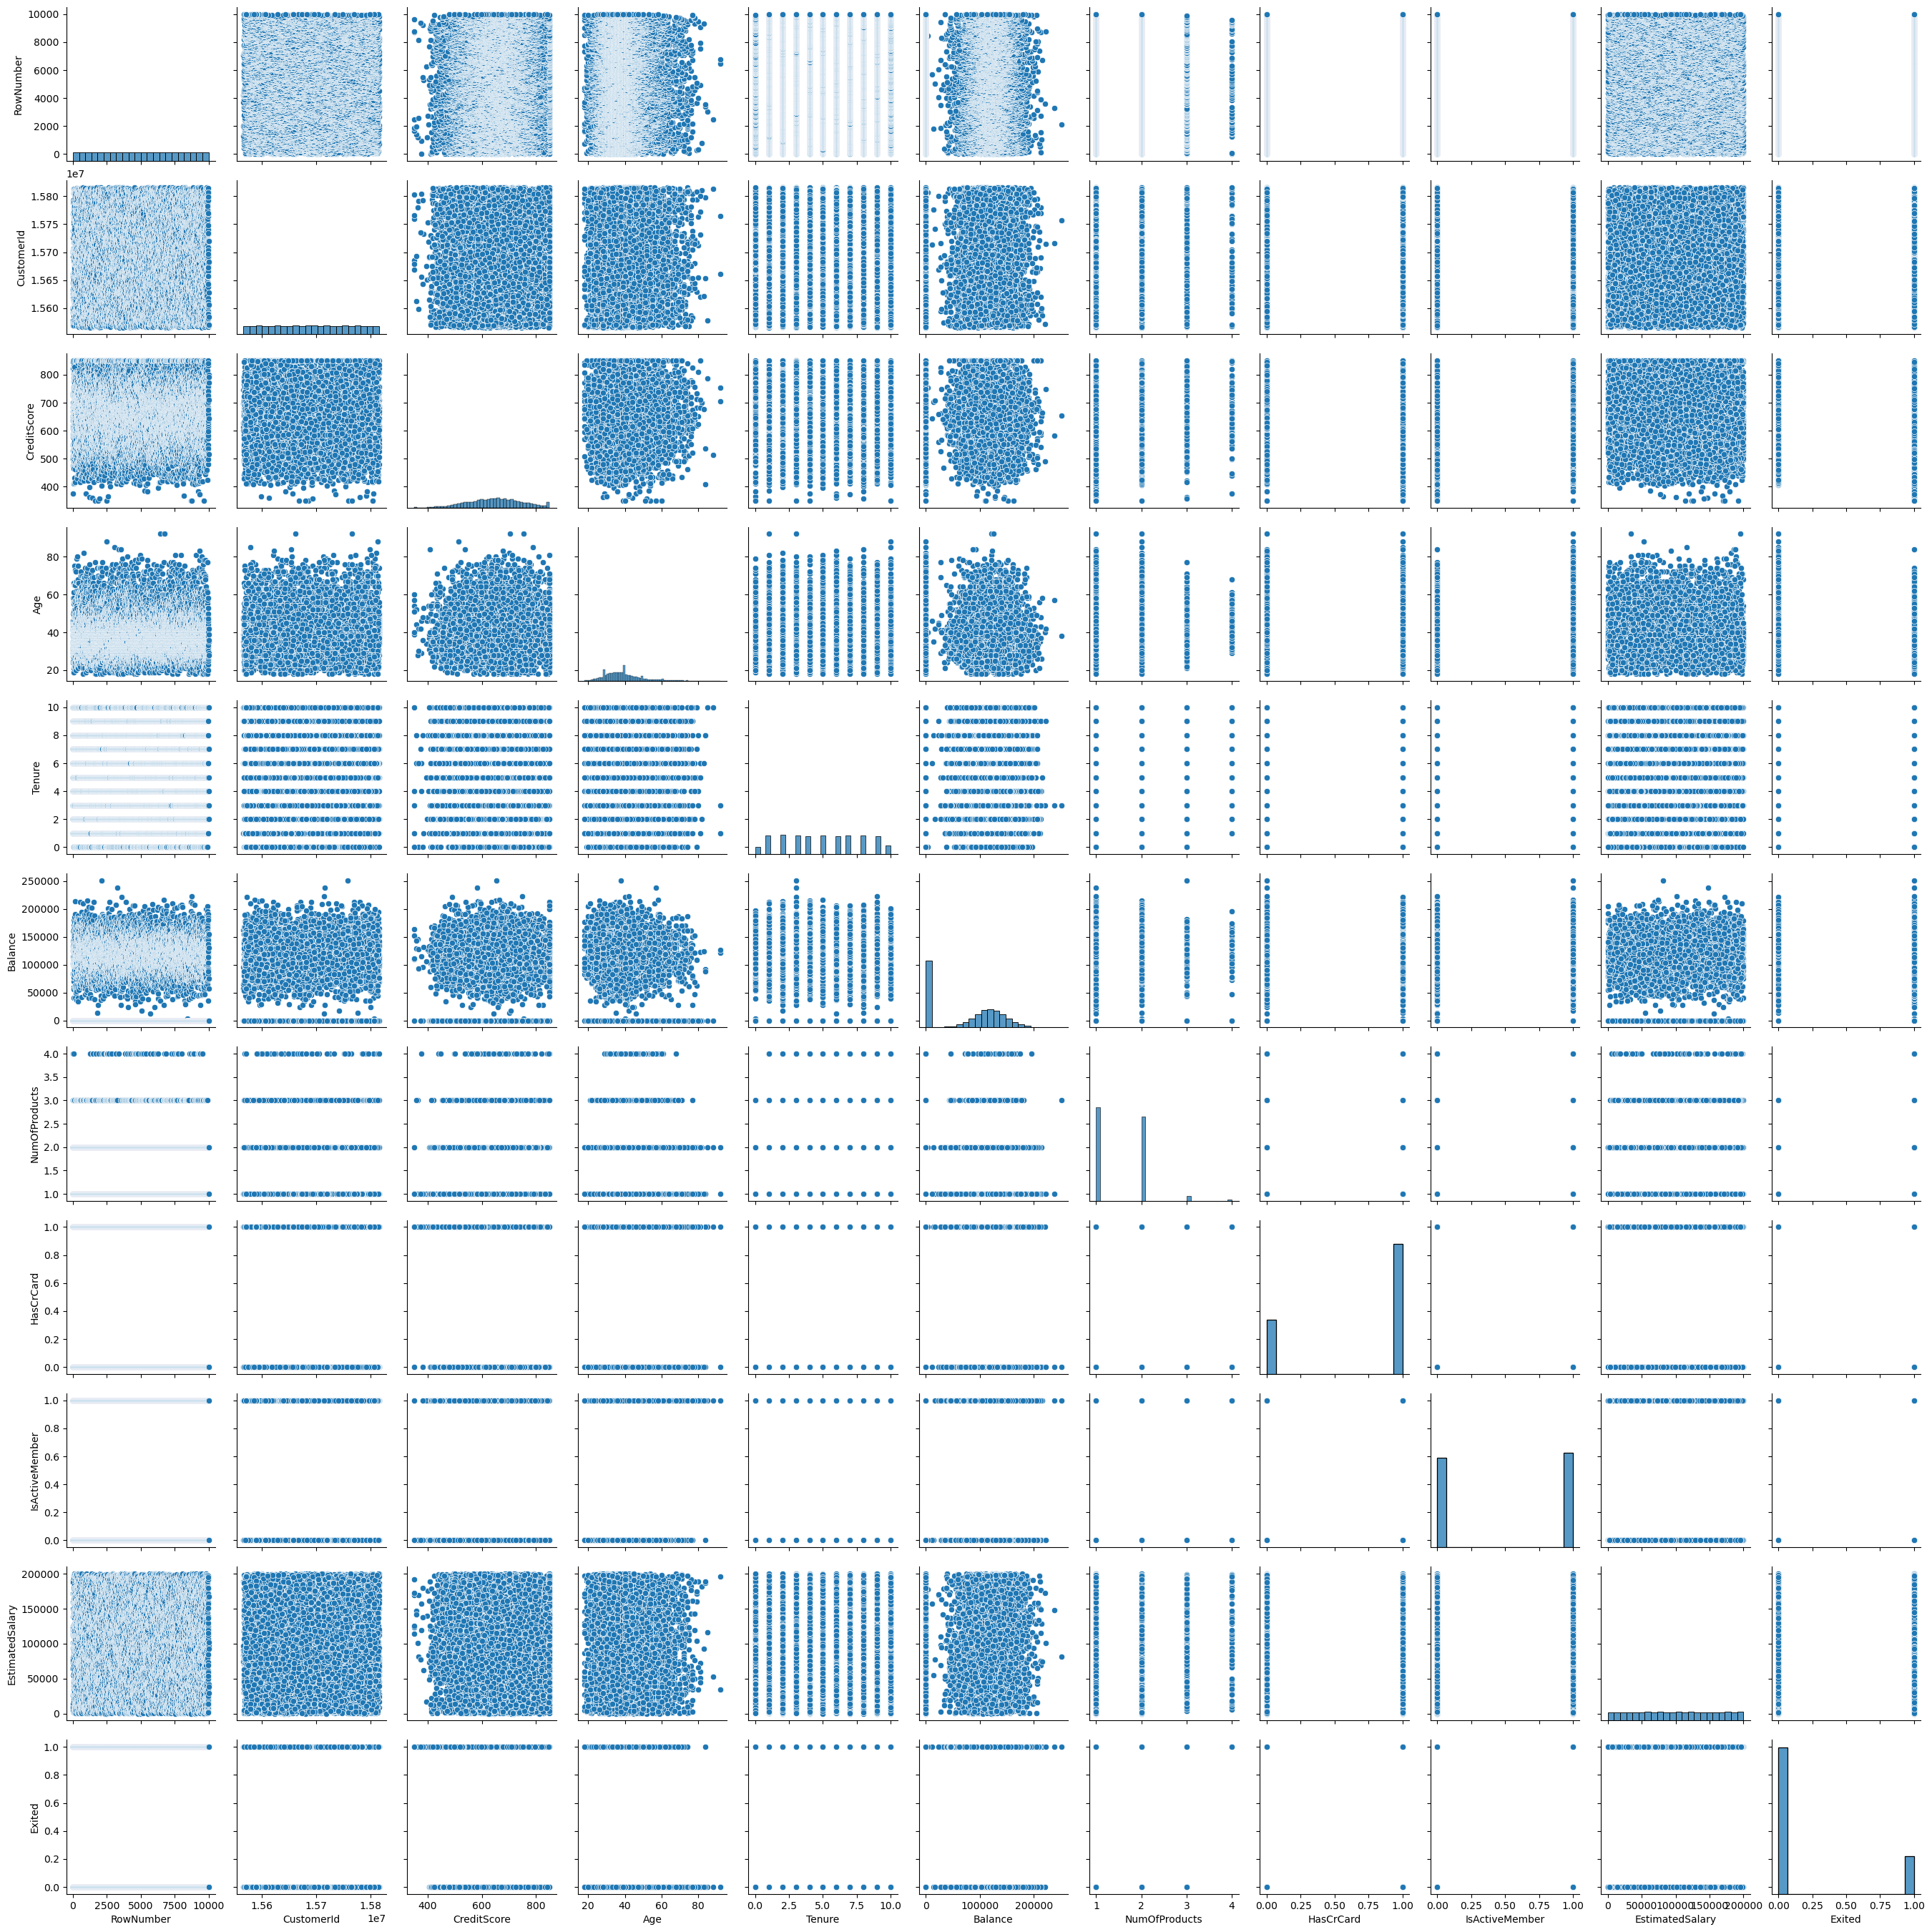

In [ ]:
sns.pairplot(df)

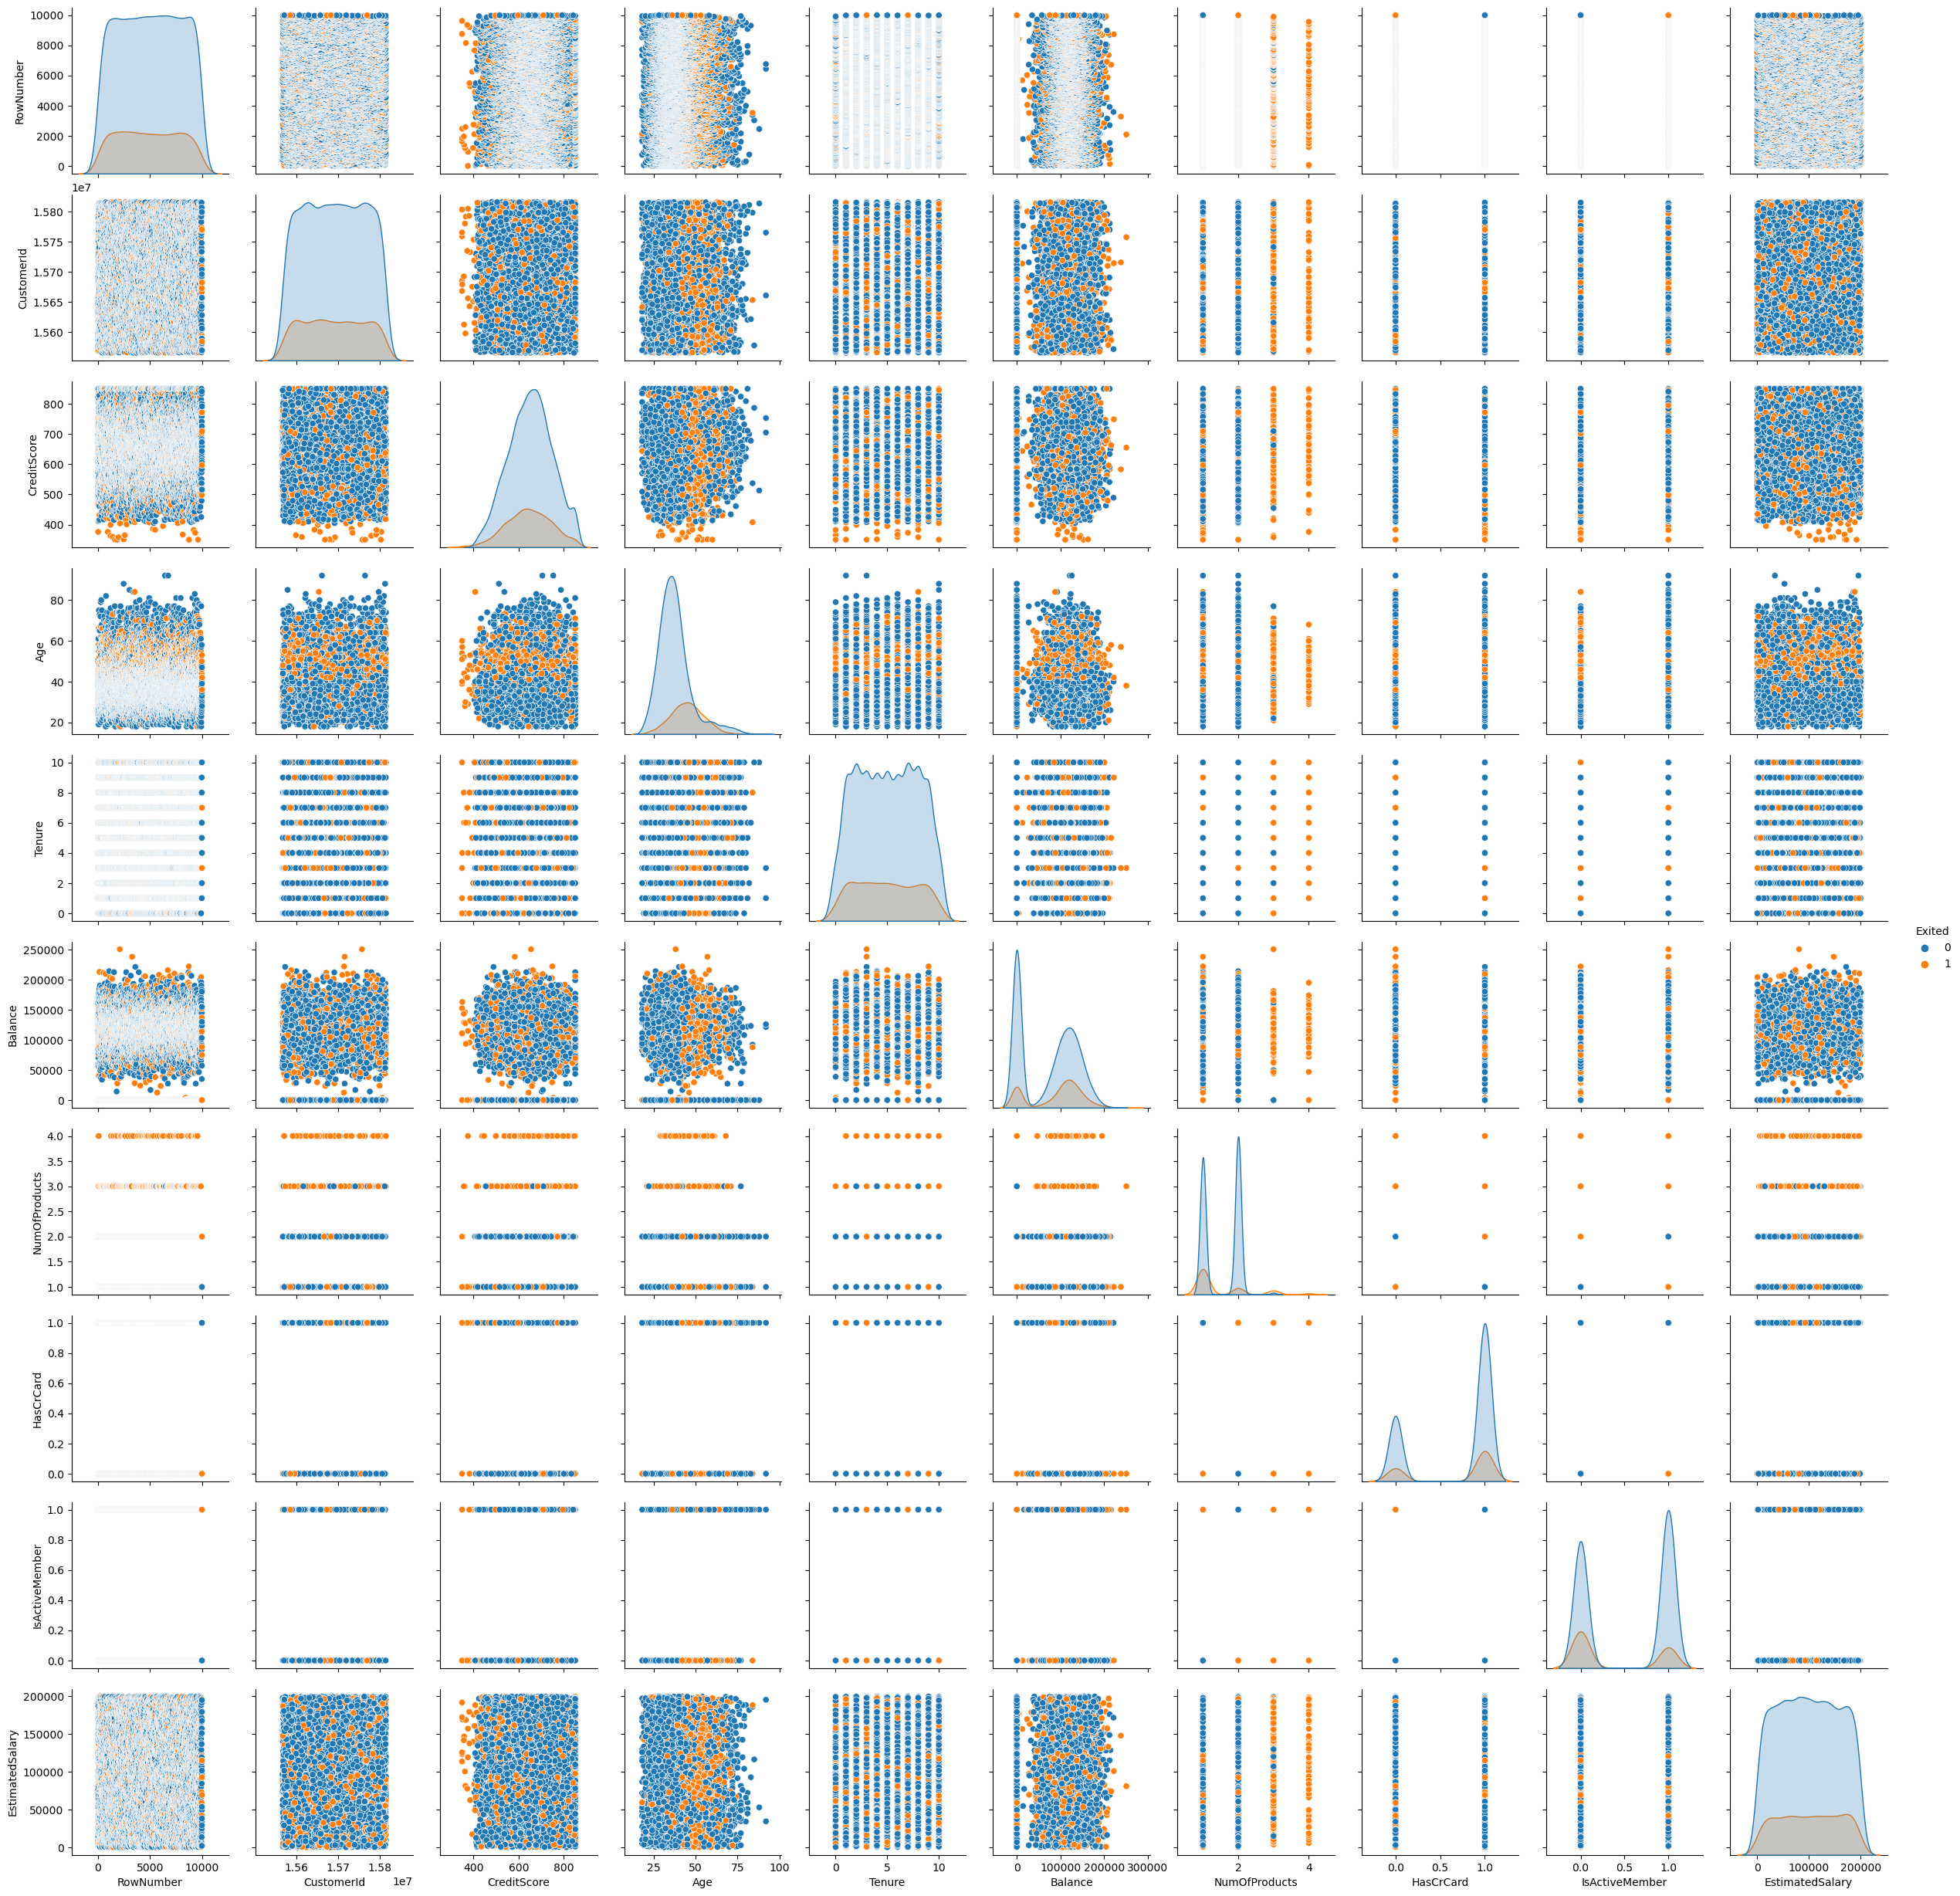

In [ ]:
sns.pairplot(df,hue="Exited")

<Axes: ylabel='Gender'>

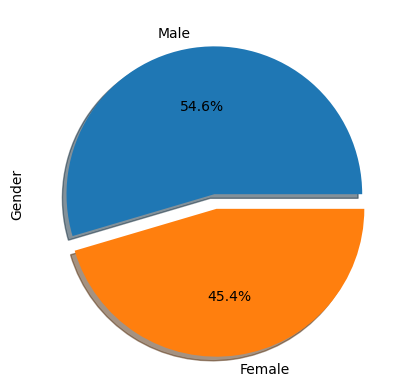

In [ ]:
df['Gender'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct="%0.1f%%")

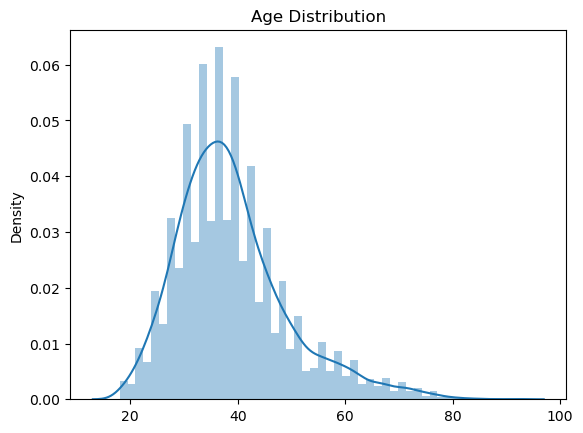

In [ ]:
plt.title('Age Distribution')
sns.distplot(x=df['Age'])
plt.show()

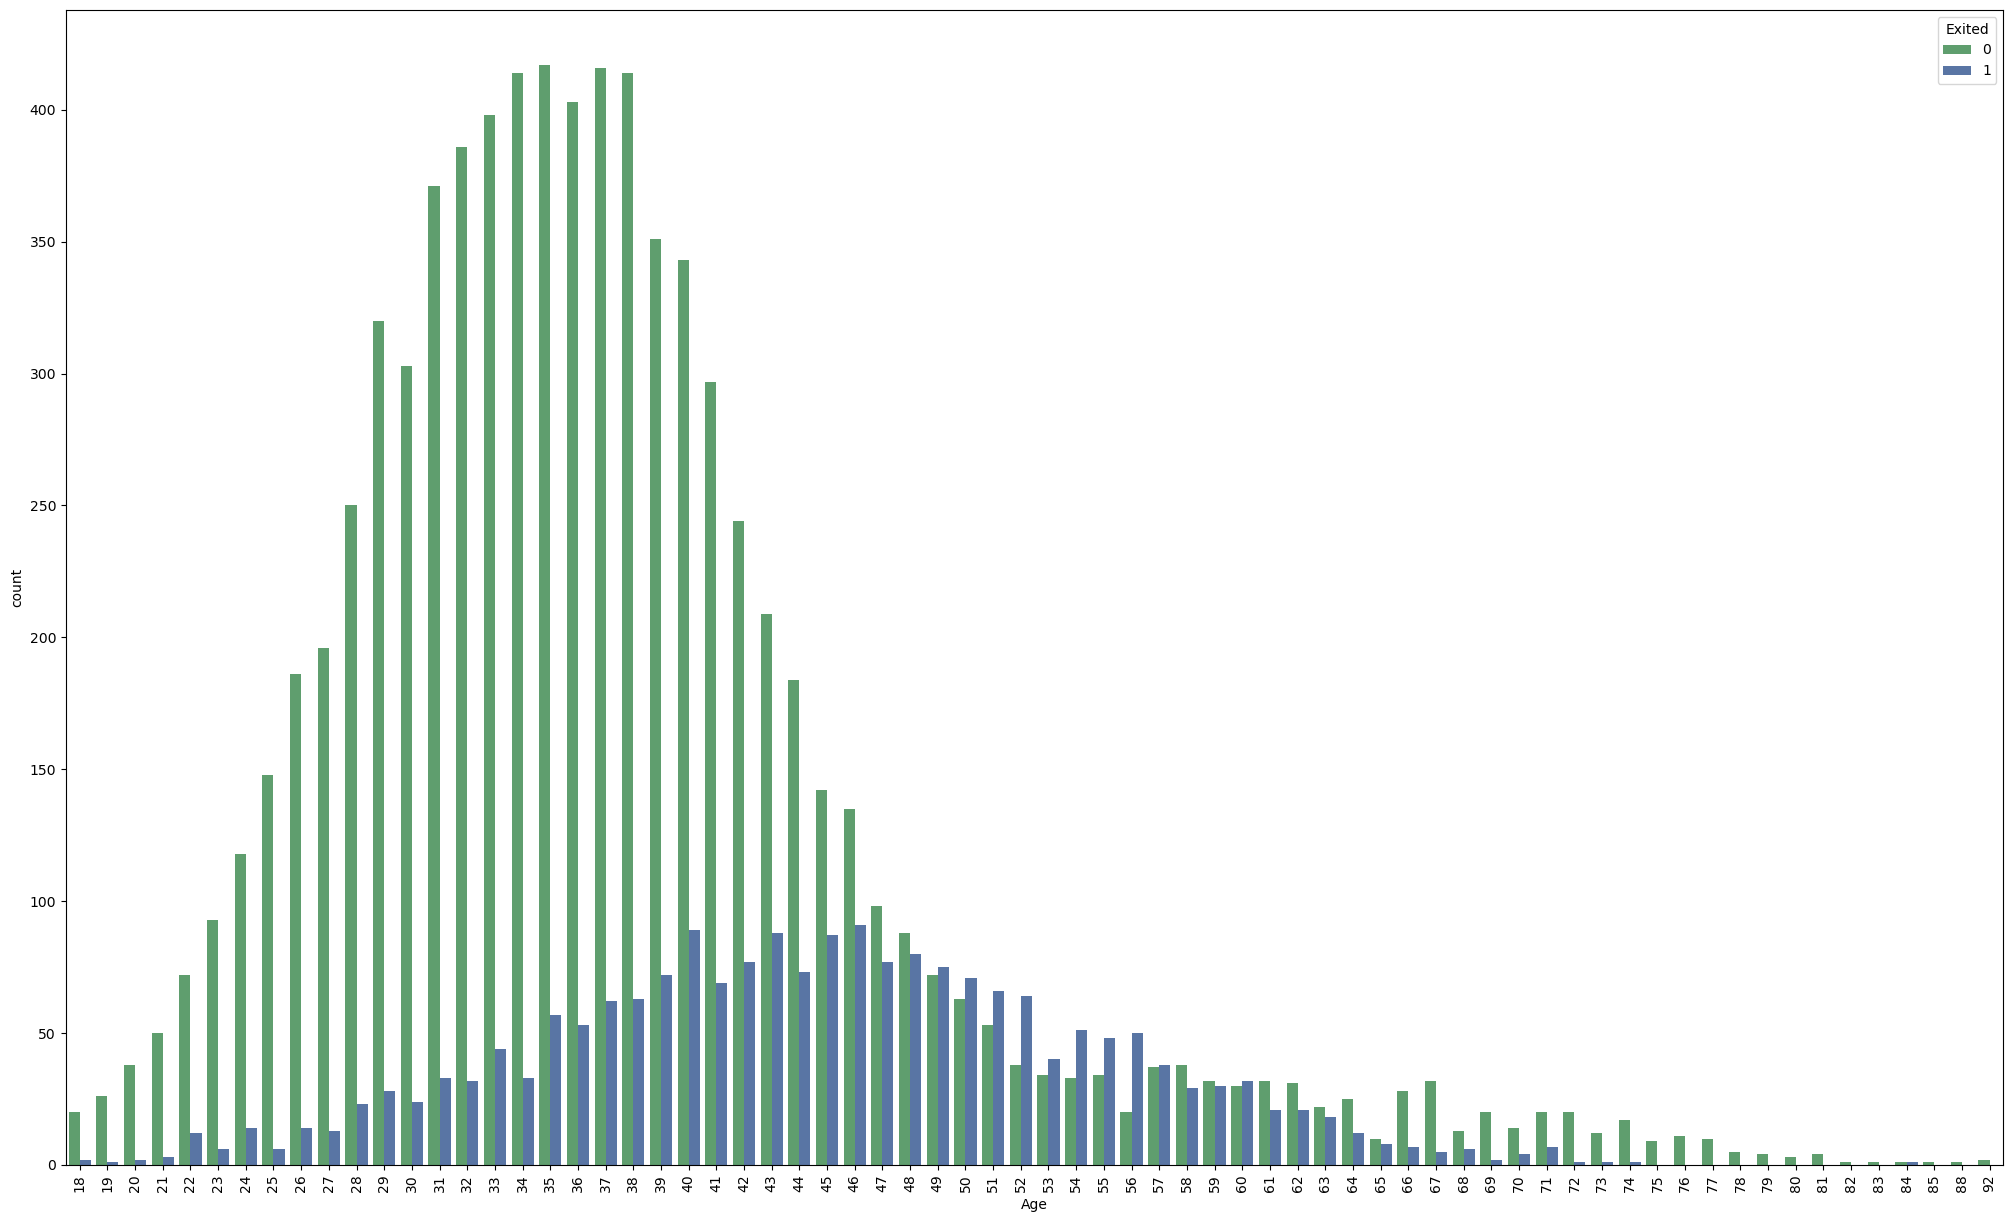

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(hue='Exited',x='Age',data=df,palette=['#55A868', '#4C72B0'])
plt.xticks(rotation=90)
plt.show()

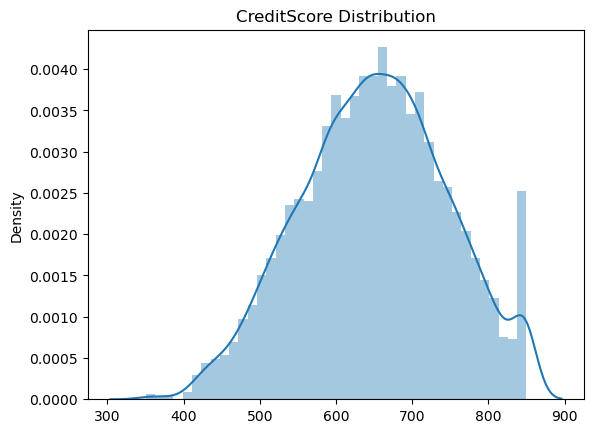

In [ ]:
plt.title('CreditScore Distribution')
sns.distplot(x=df['CreditScore'])
plt.show()

<Axes: xlabel='Exited,CreditScore'>

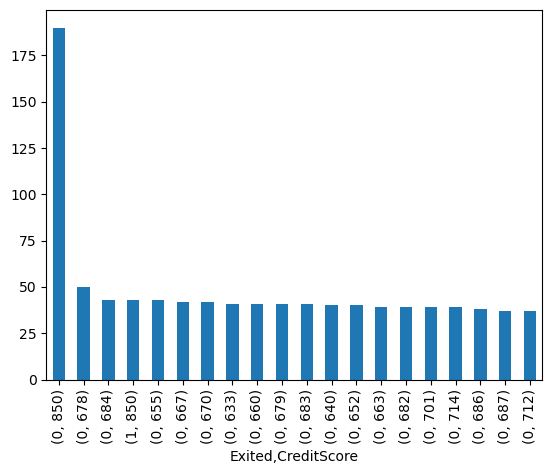

In [ ]:
df.groupby('Exited')['CreditScore'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

<Axes: ylabel='Geography'>

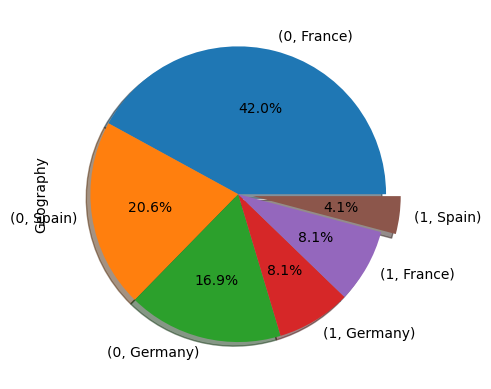

In [ ]:
df.groupby('Exited')['Geography'].value_counts().sort_values(ascending=False).plot(kind='pie',shadow=True,explode=(0,0,0,0,0,0.1),autopct='%1.1f%%')

<Axes: xlabel='Tenure', ylabel='count'>

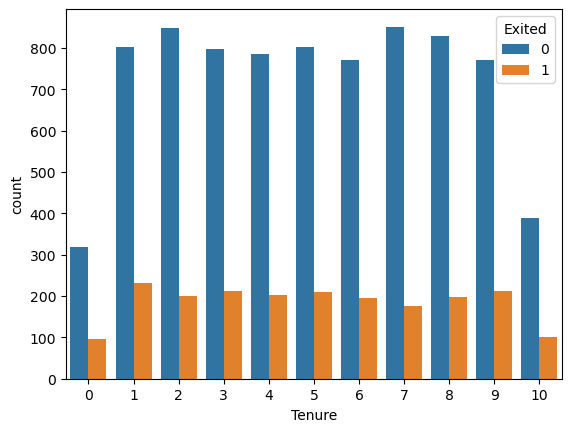

In [ ]:
sns.countplot(x='Tenure',hue='Exited',data=df)

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

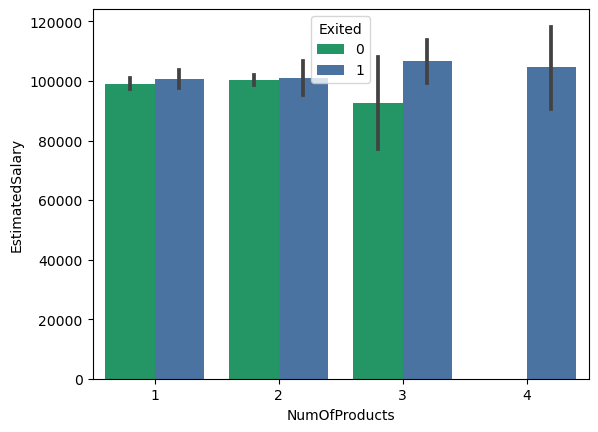

In [ ]:
sns.barplot(x='NumOfProducts',y='EstimatedSalary',hue='Exited',data=df,palette=['#11A868', '#3C72B0'])

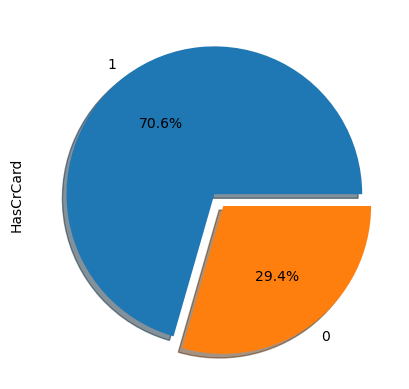

In [ ]:
df['HasCrCard'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct="%0.1f%%")
plt.show()

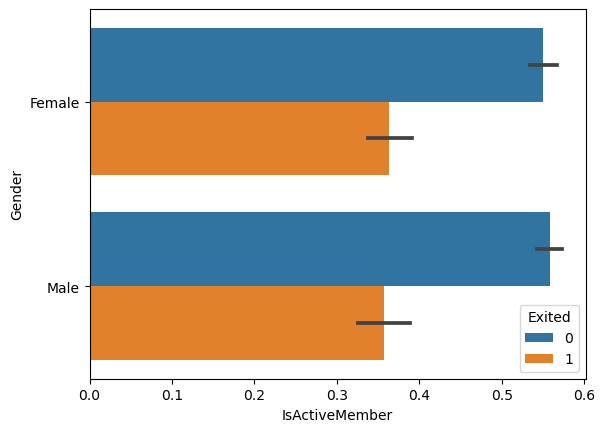

In [ ]:
sns.barplot(x='IsActiveMember',y='Gender',hue='Exited',data=df)
plt.show()

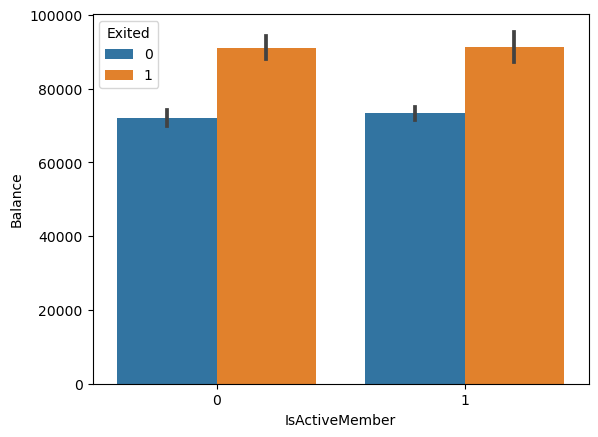

In [ ]:
sns.barplot(x='IsActiveMember',y='Balance',hue='Exited',data=df)
plt.show()

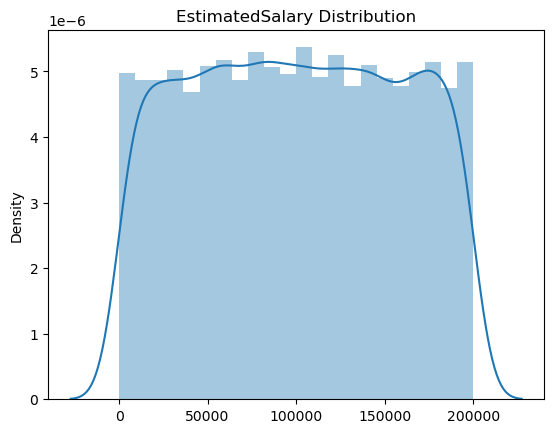

In [ ]:
plt.title('EstimatedSalary Distribution')
sns.distplot(x=df['EstimatedSalary'])
plt.show()

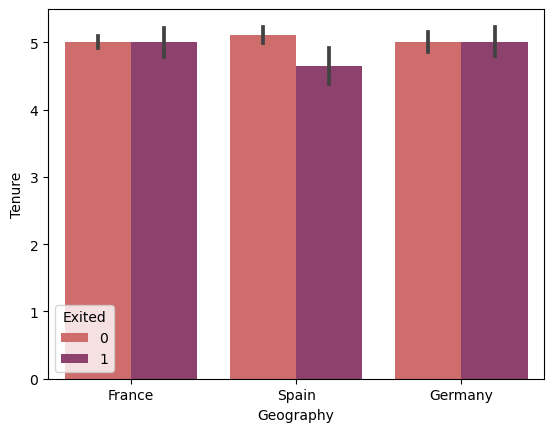

In [ ]:
sns.barplot(x='Geography',y='Tenure',hue='Exited',data=df,palette="flare")
plt.show()

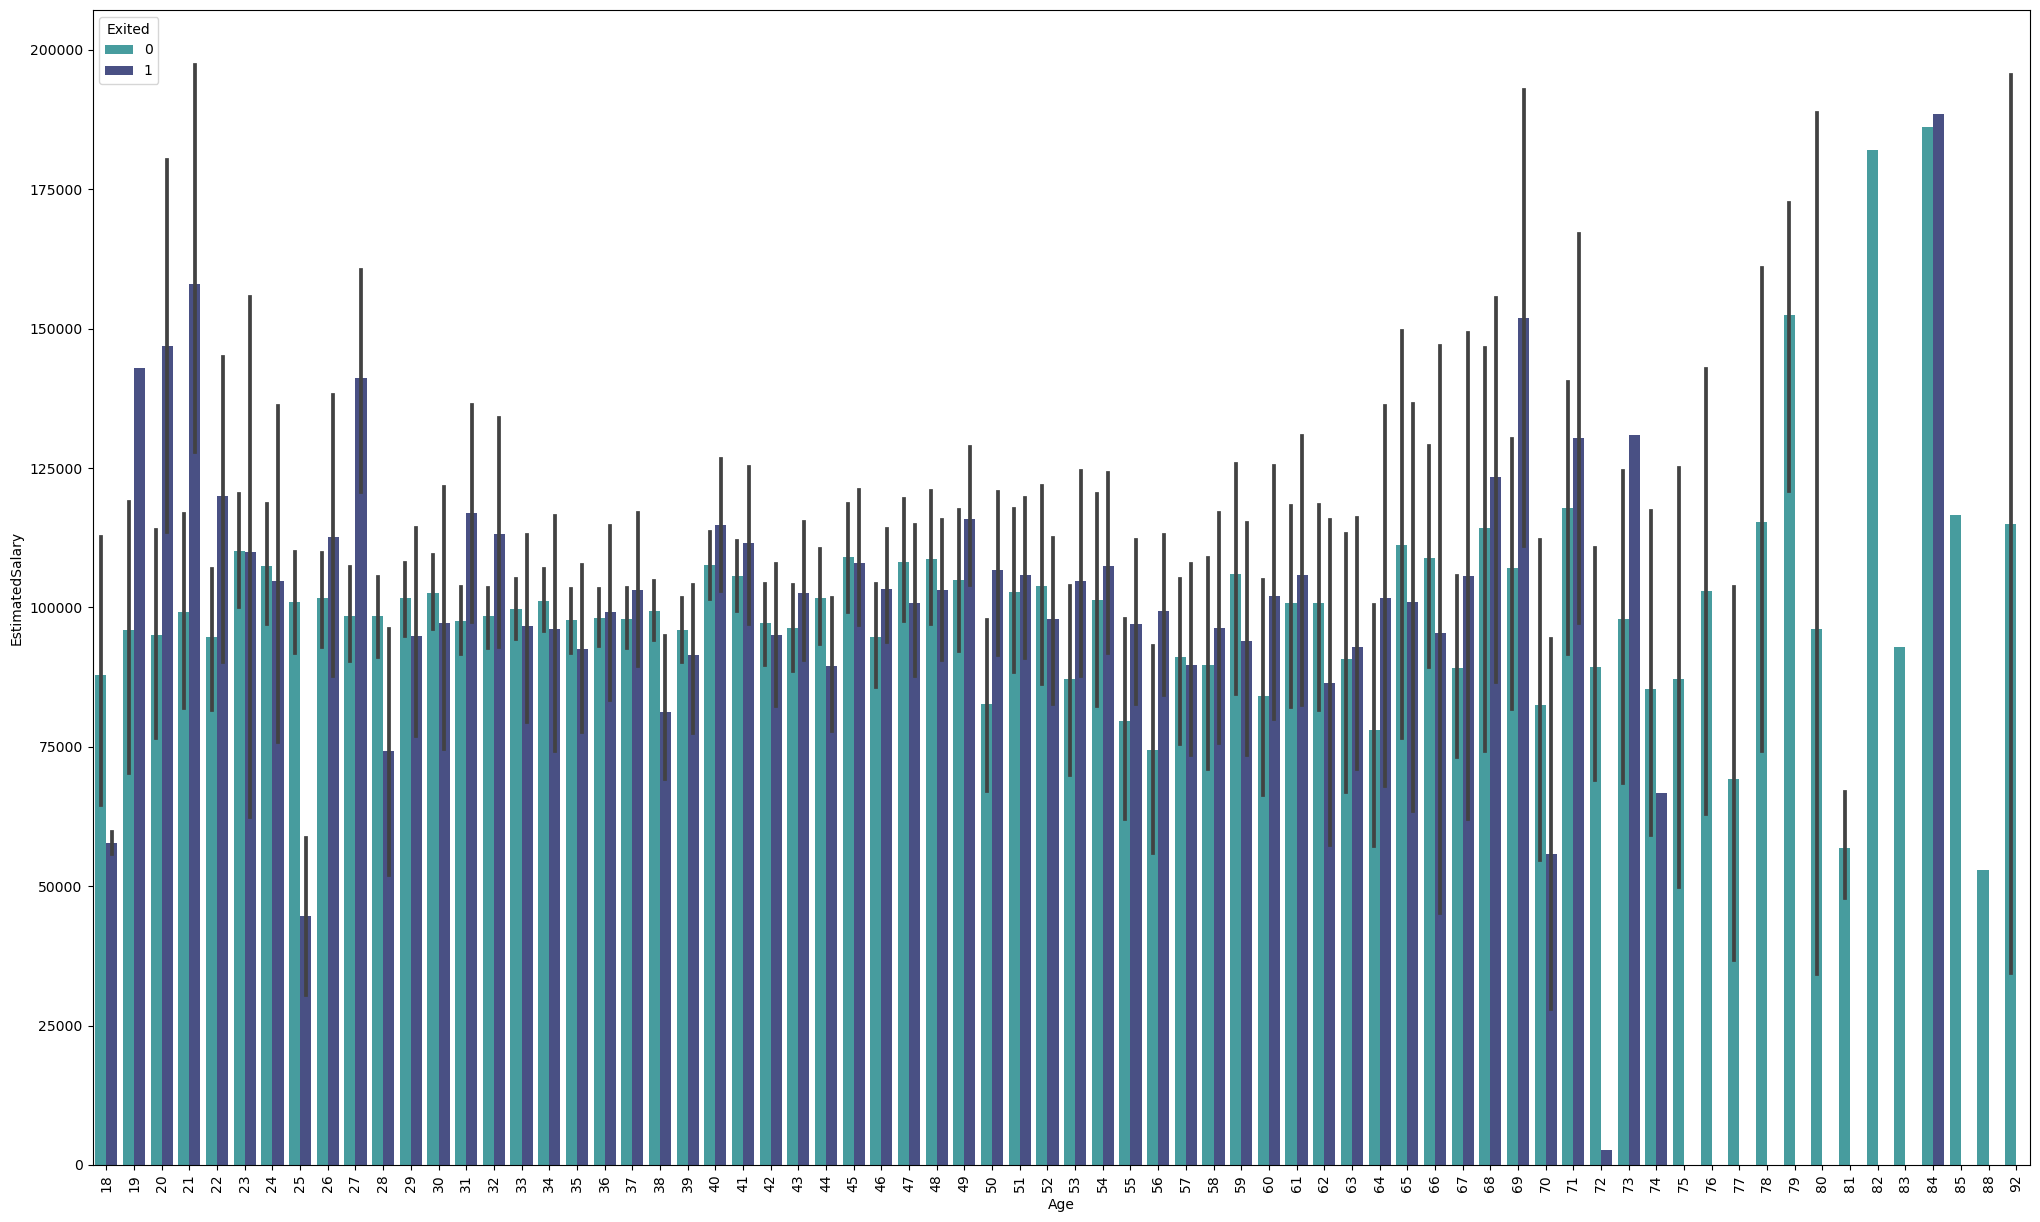

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x='Age',y='EstimatedSalary',hue='Exited',data=df,palette="mako_r")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Exited'>

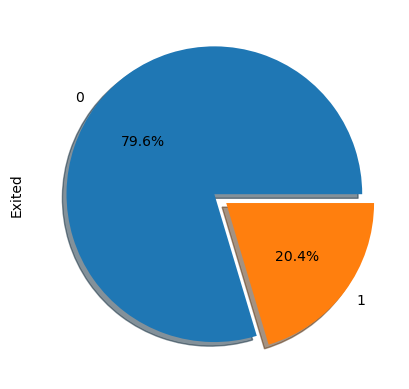

In [ ]:
df['Exited'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct="%0.1f%%")

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

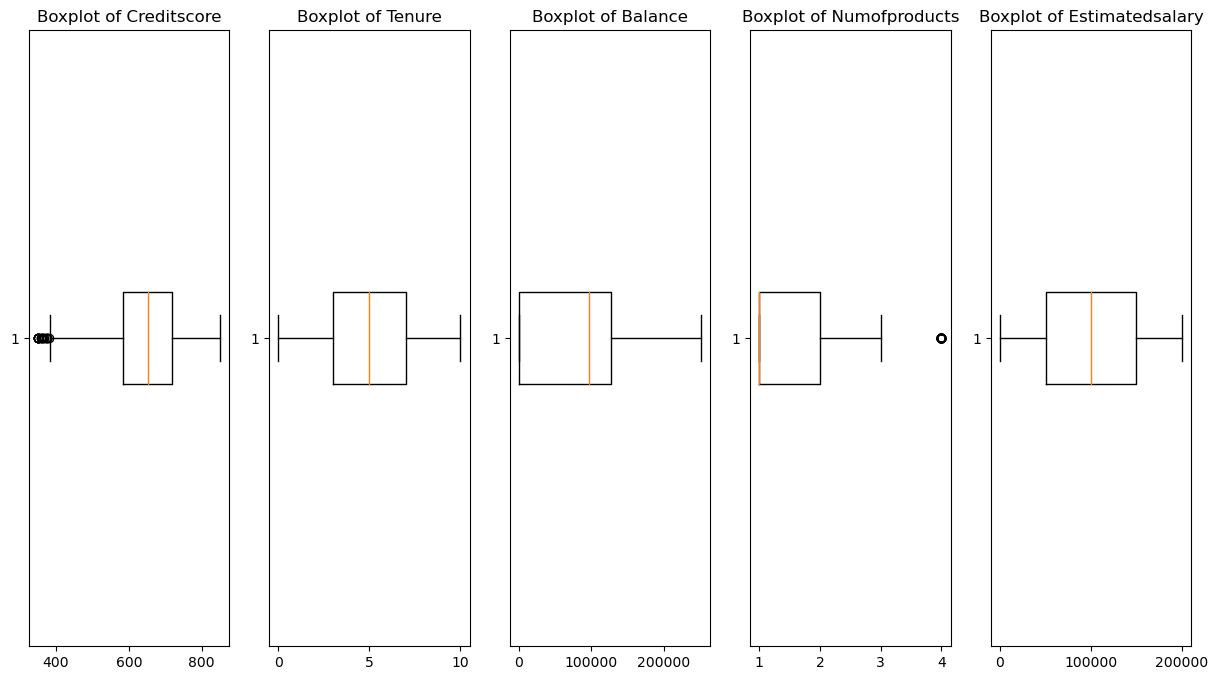

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15, 8))  # Creating a 4x3 grid of subplots

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(['CreditScore',  'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']):
    # Handle NaN values by dropping them
    data = df[col].dropna()
    axes[i].boxplot(data, vert=False)
    axes[i].set_title(f'Boxplot of {col.capitalize()}')
    axes[i].set_ylabel('')

plt.show()

In [ ]:
data=df.copy()

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
data=data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

# Preprocessing for model creation

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
categorical_features=[]
for i in data.columns:
    if data[i].dtype in ['int64','float64'] :
        pass
    else:
        categorical_features.append(i)


In [ ]:
categorical_features

['Geography', 'Gender']

In [ ]:
for i in categorical_features:
    data[i]=lb.fit_transform(data[i])

In [ ]:
data

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [ ]:
x=data.drop('Exited',axis=1).values
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
y=data['Exited'].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

array([[6.4100000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.5796830e+04],
       [5.4100000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.9823020e+04],
       [5.9000000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.3848580e+04],
       ...,
       [7.3800000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [5.9000000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [6.2300000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [ ]:
x_test

array([[5.9700000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [5.2300000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [7.0600000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [6.8500000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.6740029e+05],
       [6.9200000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 7.0849470e+04],
       [7.3100000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 3.3759410e+04]])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-0.09792126, -0.89238312,  0.92295821, ...,  0.64198477,
         0.96683535, -0.76862426],
       [-1.12612023, -0.89238312,  0.92295821, ...,  0.64198477,
        -1.03430227, -1.39359887],
       [-0.62230274, -0.89238312, -1.08347268, ..., -1.55766936,
         0.96683535, -1.49739308],
       ...,
       [ 0.89943174, -0.89238312,  0.92295821, ...,  0.64198477,
        -1.03430227,  1.41400417],
       [-0.62230274,  1.52039473, -1.08347268, ...,  0.64198477,
         0.96683535,  0.84625811],
       [-0.28299708,  0.3140058 , -1.08347268, ...,  0.64198477,
        -1.03430227,  0.32689267]])

In [ ]:
## Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as FN

In [ ]:
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.FloatTensor(y_train)
y_test=torch.FloatTensor(y_test)

In [ ]:
class churn_prediction(nn.Module):
    def __init__(self,input_feature=10,hidden_layer1=30,hidden_layer2=30,output_feature=2):
        super(churn_prediction,self).__init__()
        self.fc1=nn.Linear(input_feature,hidden_layer1)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_layer1,hidden_layer2)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(hidden_layer2,output_feature)

    def forward(self,x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.relu2(x)
        x=self.fc3(x)
        x=torch.sigmoid(x)
        return x



In [ ]:
model=churn_prediction()

In [ ]:
model

churn_prediction(
  (fc1): Linear(in_features=10, out_features=30, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=30, out_features=2, bias=True)
)

In [ ]:
x = torch.randn(32, 10)

In [ ]:
output_probabilities = model(x)

print(output_probabilities)

tensor([[0.5448, 0.5407],
        [0.5358, 0.5296],
        [0.5151, 0.5505],
        [0.5341, 0.4969],
        [0.5162, 0.5386],
        [0.5255, 0.5150],
        [0.5335, 0.5089],
        [0.5002, 0.5333],
        [0.5163, 0.4936],
        [0.5250, 0.5207],
        [0.5070, 0.5185],
        [0.5138, 0.5185],
        [0.5420, 0.5069],
        [0.5235, 0.5243],
        [0.5238, 0.5271],
        [0.5483, 0.5414],
        [0.5083, 0.4907],
        [0.5014, 0.5471],
        [0.5192, 0.5248],
        [0.5085, 0.4851],
        [0.4949, 0.4690],
        [0.5353, 0.5093],
        [0.5420, 0.5268],
        [0.5412, 0.5307],
        [0.5055, 0.5274],
        [0.5173, 0.5183],
        [0.5384, 0.5174],
        [0.5168, 0.5108],
        [0.5422, 0.5045],
        [0.5288, 0.5286],
        [0.5093, 0.5535],
        [0.4812, 0.5637]], grad_fn=<SigmoidBackward0>)


In [ ]:
weight_for_class_0 = 0.5
weight_for_class_1 = 2.0
class_weights = torch.tensor([weight_for_class_0, weight_for_class_1])


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

In [ ]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train.long())
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.6944150924682617
Epoch number: 11 and the loss : 0.6194741129875183
Epoch number: 21 and the loss : 0.5732407569885254
Epoch number: 31 and the loss : 0.5544917583465576
Epoch number: 41 and the loss : 0.5347923636436462
Epoch number: 51 and the loss : 0.5287652015686035
Epoch number: 61 and the loss : 0.5226060152053833
Epoch number: 71 and the loss : 0.5177755355834961
Epoch number: 81 and the loss : 0.5133450627326965
Epoch number: 91 and the loss : 0.5091554522514343
Epoch number: 101 and the loss : 0.5050678253173828
Epoch number: 111 and the loss : 0.5022137761116028
Epoch number: 121 and the loss : 0.4981473386287689
Epoch number: 131 and the loss : 0.4950561821460724
Epoch number: 141 and the loss : 0.4917553961277008
Epoch number: 151 and the loss : 0.4886523187160492
Epoch number: 161 and the loss : 0.48857390880584717
Epoch number: 171 and the loss : 0.4859703481197357
Epoch number: 181 and the loss : 0.482767254114151
Epoch number: 191 and t

Text(0, 0.5, 'Loss')

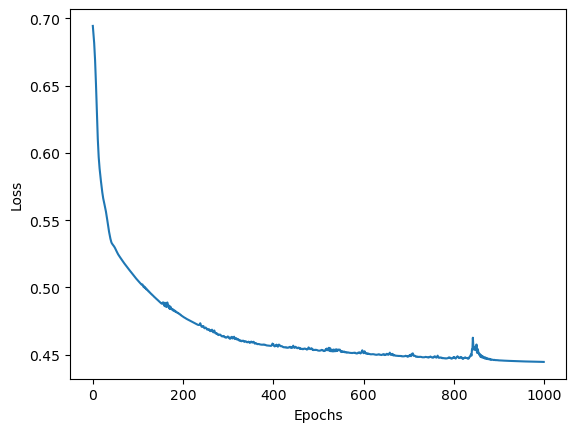

In [ ]:
plt.plot(range(epochs),[loss.item() for loss in final_losses])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
1
1
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
1
0
1
0
1
1
0
0
0
0
0
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,predictions)
cm

array([[1954,  425],
       [ 188,  433]], dtype=int64)

In [ ]:
accuracy_score=accuracy_score(y_test,predictions)
accuracy_score

0.7956666666666666